In [1]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 23.56 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [2]:
!pip install tqdm

In [3]:
import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model

import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

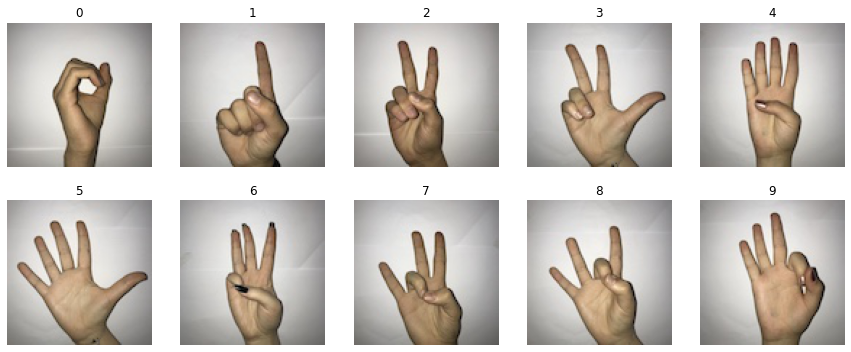

In [4]:
nrow, ncol = 2, 5
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)
for row in range(nrow):
    for col in range(ncol):
        img_index = row*ncol+col
        # load image
        img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + str(img_index) + '.JPG', target_size = (100, 100))
        plt.subplot(nrow, ncol, img_index + 1)
        plt.imshow(img)
        plt.title(img_index)
        plt.axis('off')

In [5]:
DATASET_PATH = 'Sign-Language-Digits-Dataset/Dataset/'

In [6]:
# Creating a list of filename for training set, validation set, and test set
train_set = {}
validation_set = {}
test_set = {}
for cat in os.listdir(DATASET_PATH):
  cat_dir = os.path.join(DATASET_PATH, cat) # e.g. DATASET_PATH/'0'
  cat_files = os.listdir(cat_dir)
  # Training set's size is 70% of the data
  train_list , test_list = train_test_split(cat_files, test_size = 0.3)
  # Validation set's and Test set's size are both 15% of the data
  validation_list, test_list = train_test_split(test_list, test_size = 0.5)
  train_set[cat] = train_list
  validation_set[cat] = validation_list
  test_set[cat] = test_list

In [7]:
for cat in tqdm(train_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'training_set', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in train_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'training_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 46.15it/s]


In [8]:
for cat in tqdm(validation_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'validation_set', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in validation_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'validation_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 175.16it/s]


In [9]:
for cat in tqdm(test_set.keys()):
  cat_dir = os.path.join(DATASET_PATH, 'test_set', 'class_0' + str(cat))
  os.makedirs(cat_dir)
  for file in test_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(DATASET_PATH, cat, file)
    # dest path is DATASET_PATH/'test_set'/'class_00'
    # to accomodate for the directory format required by flow_from_directory method in keras
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████| 10/10 [00:00<00:00, 233.34it/s]


In [10]:
for i in range(10):
  train_size = len(train_set[str(i)])
  validation_size = len(validation_set[str(i)])
  test_size = len(test_set[str(i)])
  print("0{} : Training size({}) Validation size({}) Test size({})".format(i, train_size, validation_size, test_size))

00 : Training size(143) Validation size(31) Test size(31)
01 : Training size(144) Validation size(31) Test size(31)
02 : Training size(144) Validation size(31) Test size(31)
03 : Training size(144) Validation size(31) Test size(31)
04 : Training size(144) Validation size(31) Test size(32)
05 : Training size(144) Validation size(31) Test size(32)
06 : Training size(144) Validation size(31) Test size(32)
07 : Training size(144) Validation size(31) Test size(31)
08 : Training size(145) Validation size(31) Test size(32)
09 : Training size(142) Validation size(31) Test size(31)


Data augmentation is performed on the training set images so that the classifier can learn any changes with respect to scaling, horizontal_flip, or others.

In [11]:
# Performing data augmentation on training dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# For validation dataset, only rescale the pictures
validation_datagen = ImageDataGenerator(rescale = 1./255)

# For test dataset, only rescale the pictures
test_datagen = ImageDataGenerator(rescale = 1./255)

training_data = train_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'training_set'),
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'validation_set'),
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(DATASET_PATH, 'test_set'),
                                            target_size = (64, 64),
                                            batch_size = 20,
                                            class_mode = 'categorical')
validation_data.labels

Found 1438 images belonging to 10 classes.
Found 310 images belonging to 10 classes.
Found 314 images belonging to 10 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

# Créer votre architecture



In [12]:
model=Sequential()
model.add(Conv2D( filters=64, kernel_size=(4,4),activation='relu',input_shape=(64,64,3),strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D( filters=64, kernel_size=(4,4),activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Dropout(0.3))


In [13]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

In [14]:
#loss cross
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:

#epoch etch imge forwad and back 100
#i change batch in imagedata processing because i see the data isnt huge to do batch 32 
r=model.fit_generator(training_data,epochs=100,verbose=1, validation_data=validation_data )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
72/72 [==============================] - 19s 87ms/step - loss: 2.4880 - accuracy: 0.0981 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/100
72/72 [==============================] - 6s 83ms/step - loss: 2.2349 - accuracy: 0.1655 - val_loss: 2.2880 - val_accuracy: 0.1452
Epoch 3/100
72/72 [==============================] - 6s 82ms/step - loss: 1.8928 - accuracy: 0.3261 - val_loss: 2.1216 - val_accuracy: 0.4323
Epoch 4/100
72/72 [==============================] - 6s 82ms/step - loss: 1.6068 - accuracy: 0.4312 - val_loss: 2.0092 - val_accuracy: 0.4452
Epoch 5/100
72/72 [==============================] - 6s 83ms/step - loss: 1.4322 - accuracy: 0.5035 - val_loss: 1.7193 - val_accuracy: 0.6161
Epoch 6/100
72/72 [==============================] - 6s 83ms/step - loss: 1.2477 - accuracy: 0.5737 - val_loss: 1.3247 - val_accuracy: 0.7194
Epoch 7/100
72/72 [==============================] - 6s 83ms/step - loss: 1.1877 - accuracy: 0.5904 - val_loss: 1.0495 - val_accuracy: 0.7677
Epoch

In [16]:
score=model.evaluate(test_data,verbose=0)
score

[0.14016911387443542, 0.9681528806686401]

***SVM with CNN***

In [17]:
#I relied on this code: https://www.analyticsvidhya.com/blog/2021/06/build-an-image-classifier-with-svm/
from keras.regularizers import l2

modelwithSvm=Sequential()
modelwithSvm.add(Conv2D( filters=64, kernel_size=(4,4),activation='relu',input_shape=(64,64,3),strides=(2,2)))
modelwithSvm.add(MaxPooling2D(pool_size=(2,2)))
modelwithSvm.add(Conv2D( filters=64, kernel_size=(4,4),activation='relu', strides=(1,1)))
modelwithSvm.add(MaxPooling2D(pool_size=(2,2)))
modelwithSvm.add(Conv2D(32,3,3,activation='relu'))
modelwithSvm.add(Dropout(0.3))
modelwithSvm.add(Flatten())
modelwithSvm.add(Dense(256,activation='relu'))
modelwithSvm.add(BatchNormalization())
modelwithSvm.add(Dense(10, kernel_regularizer=l2(0.01),activation='softmax'))
modelwithSvm.compile(loss = 'squared_hinge',optimizer='adam',metrics=['accuracy'])
r1=modelwithSvm.fit_generator(training_data,epochs=100,verbose=1, validation_data=validation_data )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/100
72/72 [==============================] - 7s 85ms/step - loss: 1.3009 - accuracy: 0.1050 - val_loss: 1.2429 - val_accuracy: 0.1000
Epoch 2/100
72/72 [==============================] - 6s 84ms/step - loss: 1.2178 - accuracy: 0.1154 - val_loss: 1.1967 - val_accuracy: 0.1032
Epoch 3/100
72/72 [==============================] - 6s 85ms/step - loss: 1.1872 - accuracy: 0.1064 - val_loss: 1.1799 - val_accuracy: 0.1065
Epoch 4/100
72/72 [==============================] - 6s 85ms/step - loss: 1.1768 - accuracy: 0.1106 - val_loss: 1.1745 - val_accuracy: 0.1000
Epoch 5/100
72/72 [==============================] - 6s 83ms/step - loss: 1.1711 - accuracy: 0.1328 - val_loss: 1.1710 - val_accuracy: 0.1065
Epoch 6/100
72/72 [==============================] - 6s 82ms/step - loss: 1.1521 - accuracy: 0.2378 - val_loss: 1.1445 - val_accuracy: 0.3968
Epoch 7/100
72/72 [==============================] - 6s 81ms/step - loss: 1.1246 - accuracy: 0.3755 - val_loss: 1.1118 - val_accuracy: 0.4452
Epoch 

In [18]:
score=modelwithSvm.evaluate(test_data)
score

16/16 [==============================] - 1s 39ms/step - loss: 0.9320 - accuracy: 0.9522


[0.9320040941238403, 0.9522293210029602]

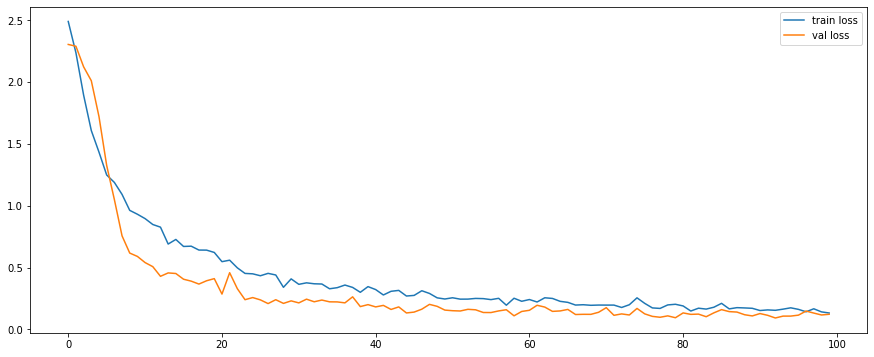

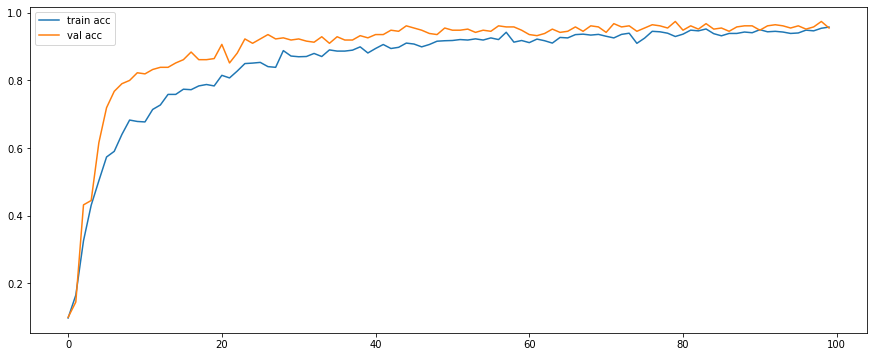

In [19]:
#for CNN
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


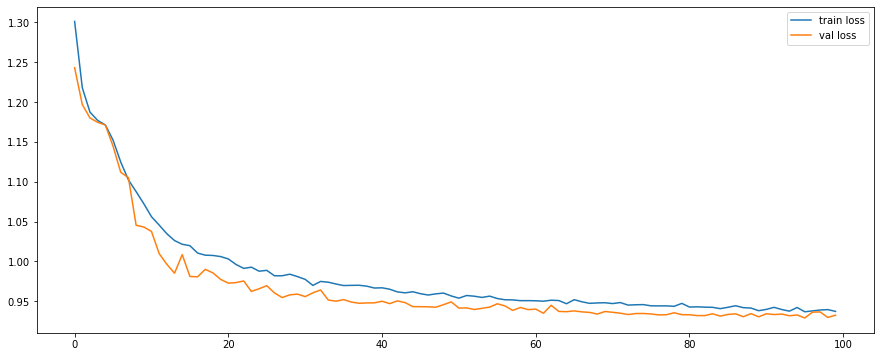

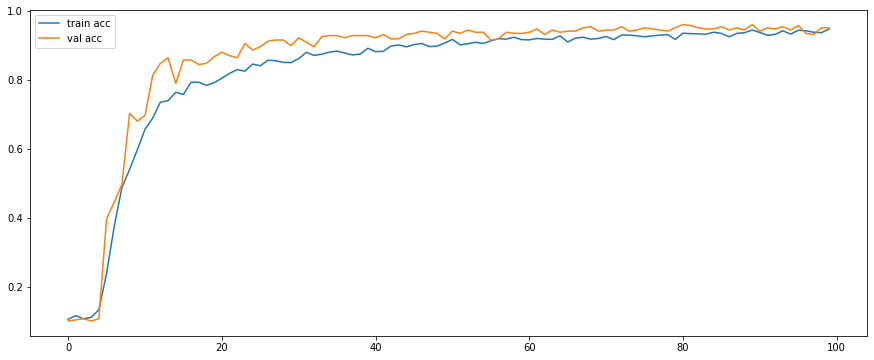

In [20]:
#for cnn+svm
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()